## https://youtu.be/s5tNevBIg4Y

"""

Binary classification using keras

This is the normal way most of us approach the problem of binary classification
using neural networks (deep learning). In this example, we will split our
data set the normal way into train and test groups.

In the next python file, we will learn to divide data using K Fold splits.
We will iterate through each split to train and evaluate our model.

Wisconsin breast cancer example
Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

"""


In [1]:
import sys
("Python version is", sys.version)
import sklearn
print("Scikit-learn version is: ", sklearn.__version__)
import tensorflow as tf
print("Tensorflow version is: ", tf.__version__)
import numpy as np

#Our standard way of defining and training a model - with no KFold CV
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


Scikit-learn version is:  1.2.2
Tensorflow version is:  2.14.0


In [2]:
df = pd.read_csv("/content/wisc_bc_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
df.describe().T  #Values need to be normalized before fitting.

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
df.isnull().sum()
#df = df.dropna()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [5]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})


In [6]:
df.dtypes

id                     int64
Label                 object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

<Axes: xlabel='Label', ylabel='count'>

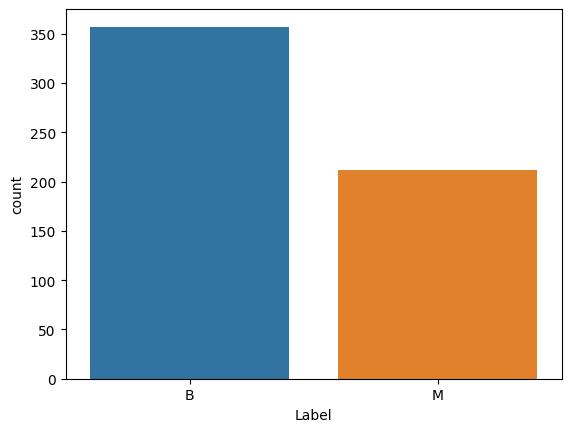

In [7]:
#Understand the data
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [8]:
df['Label'].value_counts()

B    357
M    212
Name: Label, dtype: int64

In [9]:
#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B

#class sklearn.preprocessing.LabelEncoder
Encode target labels with value between **0 and n_classes-1.**

This transformer should be used to **encode target values,** i.e. **y, and not the input X.**

In [10]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [11]:
#Define x and normalize values
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [12]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

X_train.shape,X_test.shape

((426, 30), (143, 30))

#Scale, Standardize, or Normalize with Scikit-Learn
##When to use **MinMaxScaler, RobustScaler, StandardScaler, and Normalizer.**

##**Scale** generally means to change the range of the values. The shape of the distribution doesn’t change.

##**Standardize** generally means changing the values so that the distribution’s standard deviation equals one. Scaling is often implied.

##**Normalize** can be used to mean either of the above things (and more!).
****************************************************************************
##The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.

##**Normalization** scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

##**Standardization** scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.
************************************************************************

#Data Normalization
Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.

Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.

A value is normalized as follows:

#y = (x – min) / (max – min)

Where the minimum and maximum values pertain to the value x being normalized.

For example, for a dataset, we could guesstimate the min and max observable values as 30 and -10. We can then normalize any value, like 18.8, as follows:

y = (x – min) / (max – min)

y = (18.8 – (-10)) / (30 – (-10))

y = 28.8 / 40

y = 0.72

You can normalize your dataset using the scikit-learn object **MinMaxScaler.**

Good practice usage with the MinMaxScaler and other scaling techniques is as follows:

**Fit the scaler using available training data.** For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the **fit()** function.

**Apply the scale to training data.** This means you can use the normalized data to train your model. This is done by calling the **transform()** function.
Apply the scale to data going forward. This means you can prepare new data in the future on which you want to make predictions.

The default scale for the MinMaxScaler is to rescale variables into the range [0,1], although a preferred scale can be specified via the **“feature_range”** argument and specify a tuple, including the min and the max for all variables.

We can demonstrate the usage of this class by converting two variables to a range 0-to-1, the default range for normalization. The first variable has values between about 4 and 100, the second has values between about 0.1 and 0.001.

# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])

print(data)

# define min max scaler

####scaler = MinMaxScaler()

# transform data

####scaled = scaler.fit_transform(data)

print(scaled)

****************************************************************************
Running the example first reports the raw dataset, showing **2 columns with 4 rows.** The values are in scientific notation which can be hard to read if you’re not used to it.

Next, the scaler is defined, fit on the whole dataset and then used to create a transformed version of the dataset with **each column normalized independently.** We can see that the **largest raw value for each column now has the value 1.0 and the smallest value for each column now has the value 0.0.**

[[1.0e+02 1.0e-03]

 [8.0e+00 5.0e-02]

 [5.0e+01 5.0e-03]

 [8.8e+01 7.0e-02]

 [4.0e+00 1.0e-01]]

[[1.         0.        ]

 [0.04166667 0.49494949]

 [0.47916667 0.04040404]

 [0.875      0.6969697 ]

 [0.         1.        ]]

 Now that we are familiar with normalization, let’s take a closer look at standardization.
 *****************************************************************************





##Data Standardization

Standardizing a dataset involves **rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.**

This can be thought of as subtracting the mean value or centering the data.

Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.


A value is standardized as follows:

#y = (x – mean) / standard_deviation

Where the mean is calculated as:

##mean = sum(x) / count(x)
And the standard_deviation is calculated as:

##standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))
We can guesstimate a mean of 10.0 and a standard deviation of about 5.0. Using these values, we can standardize the first value of 20.7 as follows:

y = (x – mean) / standard_deviation

y = (20.7 – 10) / 5

y = (10.7) / 5

y = 2.14

#The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

You can standardize your dataset using the scikit-learn object StandardScaler.

We can demonstrate the usage of this class by converting two variables to a range 0-to-1 defined in the previous section. We will use the default configuration that will both center and scale the values in each column, e.g. full standardization.

The complete example is listed below.

# example of a standardization
from numpy import asarray

from sklearn.preprocessing import StandardScaler

# define data
data = asarray([[100, 0.001],

 [8, 0.05],

 [50, 0.005],

 [88, 0.07],

 [4, 0.1]])

print(data)
# define standard scaler
####scaler = StandardScaler()
# transform data
####scaled = scaler.fit_transform(data)

print(scaled)
***************************************************************************
Running the example first reports the raw dataset, showing 2 columns with 4 rows as before.

Next, the scaler is defined, fit on the whole dataset and then used to create a transformed version of the dataset with each column standardized independently. We can see that the mean value in each column is assigned a value of 0.0 if present and the values are centered around 0.0 with values both positive and negative.

[[1.0e+02 1.0e-03]

 [8.0e+00 5.0e-02]

 [5.0e+01 5.0e-03]

 [8.8e+01 7.0e-02]

 [4.0e+00 1.0e-01]]

[[ 1.26398112 -1.16389967]

 [-1.06174414  0.12639634]

 [ 0.         -1.05856939]

 [ 0.96062565  0.65304778]

 [-1.16286263  1.44302493]]

Next, we can introduce a real dataset that provides the basis for applying normalization and standardization transforms as a part of modeling.

#Q. Should I Standardize then Normalize?
Standardization can give values that are both positive and negative centered around zero.

It may be desirable to normalize data after it has been standardized.

This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.

#Q. But Which is Best?
This is unknowable.

Evaluate models on data prepared with each transform and use the transform or combination of transforms that result in the best performance for your data set on your model.

In [13]:
#Always remember to scale/normalize values after splitting.
#Otherwise some information from your test set will leak into the training process.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)           #X_train 1st fit and then transform.
X_train = scaler.transform(X_train)  #scaler converts our dataframe into arrays

X_test = scaler.transform(X_test)

X_train,  X_test,  X_train.shape,  X_test.shape

(array([[0.63158667, 0.34186851, 0.60589756, ..., 0.55429553, 0.19396807,
         0.23822642],
        [0.23773179, 0.28788927, 0.23855775, ..., 0.53127148, 0.63000197,
         0.55857274],
        [0.60125251, 0.5567474 , 0.58772972, ..., 0.61340206, 0.41533609,
         0.37557392],
        ...,
        [0.28470082, 0.2449827 , 0.27433443, ..., 0.28508591, 0.08338261,
         0.10160042],
        [0.34879397, 0.08650519, 0.3231081 , ..., 0.2024055 , 0.10546028,
         0.10356815],
        [0.21082245, 0.09204152, 0.19872825, ..., 0.30068729, 0.23023852,
         0.16515807]]),
 array([[0.2313714 , 0.17543253, 0.21829362, ..., 0.27024055, 0.23654642,
         0.15099042],
        [0.31797055, 0.36124567, 0.31171826, ..., 0.77594502, 0.24482555,
         0.34146661],
        [0.32677724, 0.30276817, 0.31912515, ..., 0.48350515, 0.23240686,
         0.2187459 ],
        ...,
        [0.21229023, 0.57785467, 0.19544406, ..., 0.07158076, 0.25310467,
         0.10383051],
        [0.6

In [15]:
#Let us define a Simple network
# Appropriate architecture for the challenge
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#If you want to build a solid model you have to follow that specific protocol of splitting your data into three sets: One for training, one for validation and one for final evaluation, which is the test set.

The idea is that you train on your training data and tune your model with the results of metrics (accuracy, loss etc) that you get from your validation set.

Your model doesn't "see" your validation set and isn't in any way trained on it, but you as the architect and master of the hyperparameters tune the model according to this data. Therefore it indirectly influences your model because it directly influences your design decisions. You nudge your model to work well with the validation data and that can possibly bring in a tilt.

Exactly that is the reason you only evaluate your model's final score on data that neither your model nor you yourself has used – and that is the third chunk of data, your test set.

Only this procedure makes sure you get an unaffected view of your models quality and ability to generalize what is has learned on totally unseen data.

In [17]:
# # fit the model
#history = model.fit(X_train, y_train ,verbose=1, epochs=20, batch_size=64,validation_data=(X_test, y_test))

history = model.fit(X_train, y_train ,verbose=1, epochs=20, batch_size=64,validation_split=0.2)
_, acc = model.evaluate(X_test, y_test)

print("**********************BEST ACCURACY BY EVALUATING ON TEST DATA*******************************************")
print("Accuracy = ", (acc * 100.0), "%")
print("*********************************************************************************************************")

Epoch 1/20
6/6 [==============================] - 1s 51ms/step - loss: 0.6649 - accuracy: 0.5794 - val_loss: 0.6700 - val_accuracy: 0.6047
Epoch 2/20
6/6 [==============================] - 0s 10ms/step - loss: 0.6541 - accuracy: 0.6235 - val_loss: 0.6535 - val_accuracy: 0.6744
Epoch 3/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6420 - accuracy: 0.6941 - val_loss: 0.6418 - val_accuracy: 0.7209
Epoch 4/20
6/6 [==============================] - 0s 12ms/step - loss: 0.6274 - accuracy: 0.6912 - val_loss: 0.6296 - val_accuracy: 0.7674
Epoch 5/20
6/6 [==============================] - 0s 14ms/step - loss: 0.6283 - accuracy: 0.6824 - val_loss: 0.6150 - val_accuracy: 0.8140
Epoch 6/20
6/6 [==============================] - 0s 14ms/step - loss: 0.6036 - accuracy: 0.7265 - val_loss: 0.6014 - val_accuracy: 0.8140
Epoch 7/20
6/6 [==============================] - 0s 12ms/step - loss: 0.5885 - accuracy: 0.7765 - val_loss: 0.5867 - val_accuracy: 0.8372
Epoch 8/20
6/6 [============

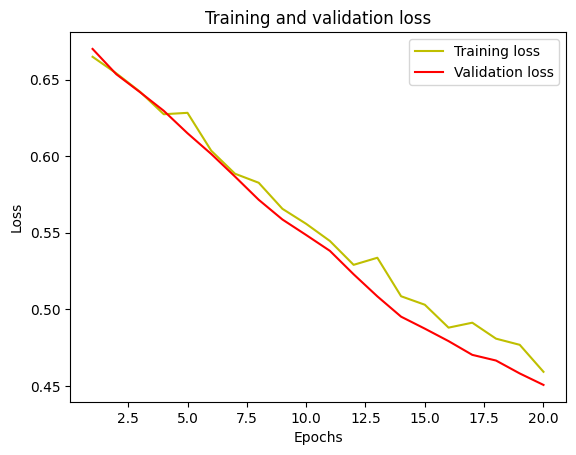

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

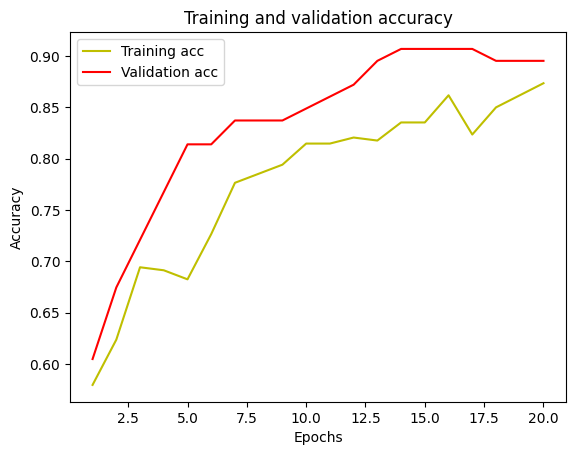

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
# Predicting the Test set results
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(f"The Threshold of prediction is \n {y_pred}")

5/5 [==============================] - 0s 7ms/step
[[0.32774752]
 [0.61352324]
 [0.5188324 ]
 [0.7333469 ]
 [0.5826076 ]
 [0.512054  ]
 [0.7818086 ]
 [0.41971865]
 [0.3897802 ]
 [0.7887448 ]
 [0.7674268 ]
 [0.5822393 ]
 [0.87894154]
 [0.8506049 ]
 [0.51911426]
 [0.5293826 ]
 [0.5744339 ]
 [0.32243836]
 [0.15378582]
 [0.47533533]
 [0.6419758 ]
 [0.44906735]
 [0.76516855]
 [0.49982378]
 [0.73465323]
 [0.6993567 ]
 [0.30473965]
 [0.830852  ]
 [0.15736328]
 [0.24002941]
 [0.29965955]
 [0.19682041]
 [0.35200873]
 [0.37272283]
 [0.79715943]
 [0.53226346]
 [0.7910757 ]
 [0.24997905]
 [0.30672213]
 [0.36381656]
 [0.35221753]
 [0.33050147]
 [0.29911855]
 [0.5707683 ]
 [0.8697402 ]
 [0.22540733]
 [0.3022362 ]
 [0.47605732]
 [0.14521796]
 [0.6891397 ]
 [0.7283374 ]
 [0.4023491 ]
 [0.42072654]
 [0.22741635]
 [0.24120721]
 [0.7212347 ]
 [0.38128707]
 [0.33833018]
 [0.69417334]
 [0.4422232 ]
 [0.72208285]
 [0.2908424 ]
 [0.4959987 ]
 [0.31981277]
 [0.5381542 ]
 [0.7246243 ]
 [0.7580659 ]
 [0.4274928

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm


array([[86,  6],
       [ 4, 47]])

cm[0][0] = TP

cm[1][1] = TN

cm[0][1] = FP

cm[1][0] = FN

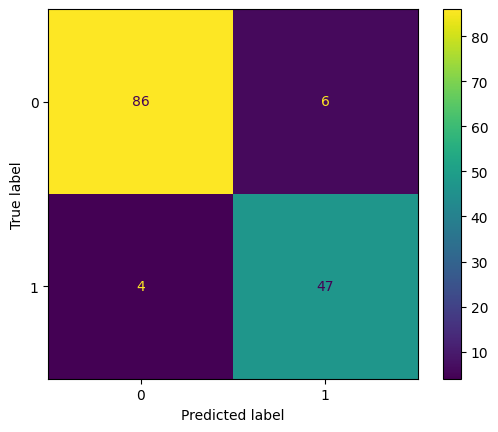

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

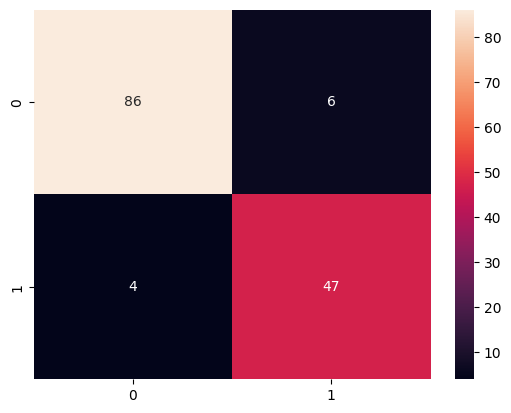

In [23]:
sns.heatmap(cm, annot=True);

#Compute confusion matrix to evaluate the accuracy of a classification.

###sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

**y_true**

array-like of shape (n_samples,)
Ground truth (correct) target values.

**y_pred**

array-like of shape (n_samples,)
Estimated targets as returned by a classifier.

**normalize{‘true’, ‘pred’, ‘all’}, default=None**

Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.
****************************************************************************
By definition a confusion matrix C
 is such that Cī,j
 is equal to the number of observations known to be in group i
 and predicted to be in group j.
.

Thus in binary classification, the count of **true negatives is Co,o**
, **false negatives is C1,0**
, **true positives is C1,1**
 and **false positives is C1,0**.
.



#Confusion Matrix
A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.

For binary classification, the matrix will be of a 2X2 table, For multi-class classification, the matrix shape will be equal to the number of classes i.e for n classes it will be nXn.

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

#True Positive (TP):

 It is the total counts having both predicted and actual values are Dog.

#True Negative (TN):

 It is the total counts having both predicted and actual values are Not Dog.

#False Positive (FP):

 It is the total counts having prediction is Dog while actually Not Dog.

#False Negative (FN):

 It is the total counts having prediction is Not Dog while actually, it is Dog.

 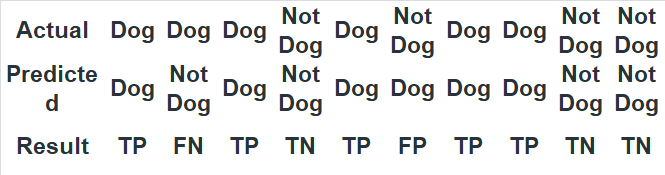


Actual Dog Counts = 6

Actual Not Dog Counts = 4

True Positive Counts = 5

False Positive Counts = 1

True Negative Counts = 3

False Negative Counts = 1


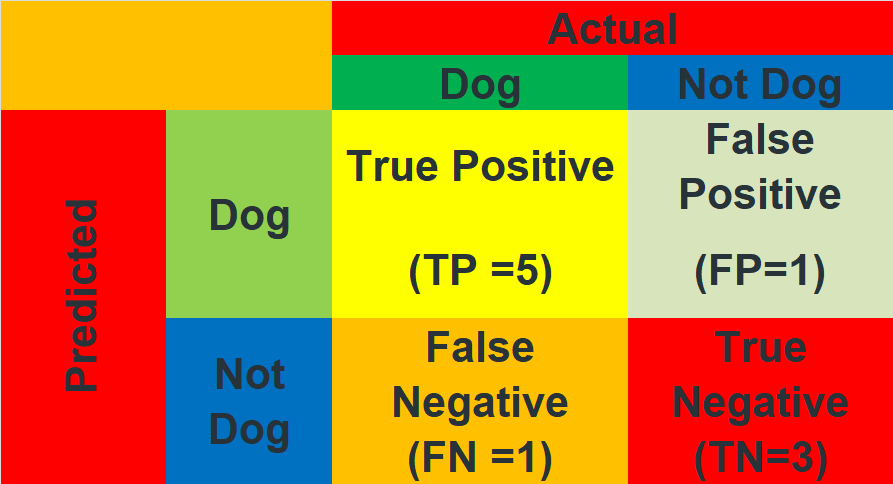

From the confusion matrix, we can find the following metrics

#Accuracy:  
Accuracy is used to **measure the performance of the model.** It is the ratio of Total correct instances to the total instances.

##Accuracy =  {TP+TN}/{TP+TN+FP+FN}

For the above case:

Accuracy = (5+3)/(5+3+1+1) = 8/10 = 0.8

#Precision:
Precision is a measure of **how accurate a model’s positive predictions are.** It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model

##{Precision} = {TP}/{TP+FP}

For the above case:

Precision = 5/(5+1) =5/6 = 0.8333

#Recall:
Recall measures the **effectiveness of a classification model in identifying all relevant instances from a dataset.** It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.

##{Recall} = {TP}/{TP+FN}

 For the above case:

Recall = 5/(5+1) =5/6 = 0.8333

#F1-Score:
 F1-score is used to **evaluate the overall performance of a classification model.** It is the harmonic mean of precision and recall,

##{F1-Score} = {2 * Precision * Recall}/{Precision + Recall}

 For the above case:

F1-Score: = (2* 0.8333* 0.8333)/( 0.8333+ 0.8333)  = 0.8333

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9300699300699301
Precision : 0.8867924528301887
Recall    : 0.9215686274509803
F1-score  : 0.9038461538461539


#DECISION TREE CLASSIFICATION ALGORITHM

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.



In [25]:
#Train the model
tree = DecisionTreeClassifier(random_state=23)
tree.fit(X_train, y_train)

# preduction
y_pred = tree.predict(X_test)

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[87,  5],
       [ 3, 48]])

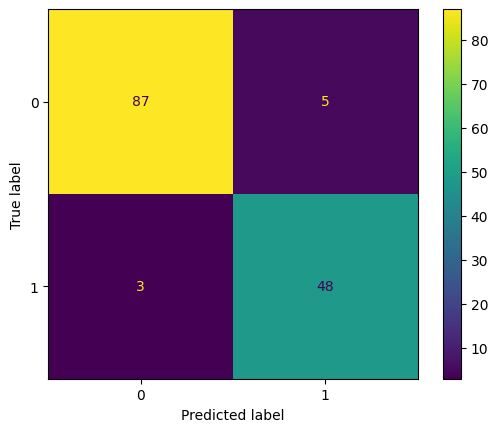

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

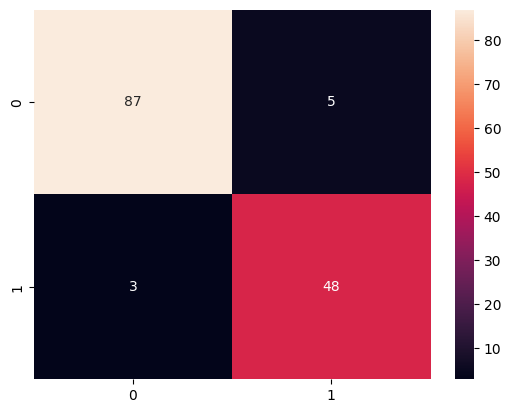

In [27]:
sns.heatmap(cm, annot=True);

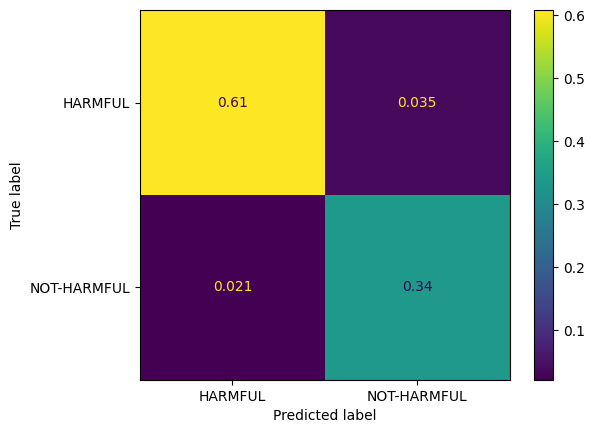

In [28]:
#normalize{‘true’, ‘pred’, ‘all’}, default=None
#Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, normalize='all')   # normalization
cmd = ConfusionMatrixDisplay(cm, display_labels=['HARMFUL','NOT-HARMFUL'])
cmd.plot();

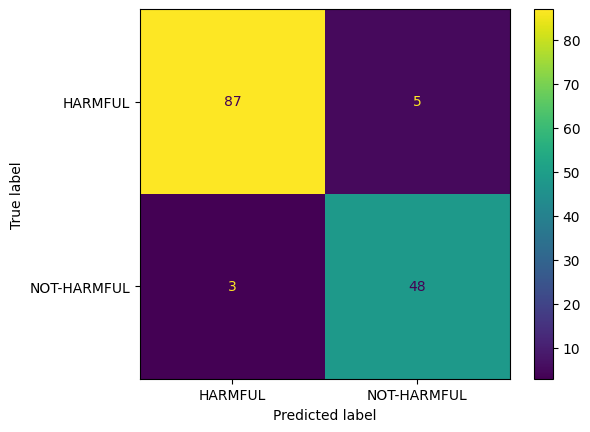

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['HARMFUL','NOT-HARMFUL'])
cmd.plot();

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

Accuracy   : 0.9440559440559441
Precision : 0.9056603773584906
Recall    : 0.9411764705882353
F1-score  : 0.923076923076923


#Evaluating keras model using KFold cross validation

###To be sure that the model can perform well on unseen data, we use a re-sampling technique, called Cross-Validation.

###We often follow a simple approach of splitting the data into 3 parts, namely, Train, Validation and Test sets. But this technique does not generally work well for cases when we don’t have a large datasets. When we have limited data, dividing the dataset into Train and Validation sets may casue some data points with useful information to be excluded from the training procedure, and the model fails to learn the data distrubution properly.


##So, what different do we do in K-Fold cross validation do?

https://miro.medium.com/v2/resize:fit:750/format:webp/1*PdwlCactbJf8F8C7sP-3gw.png

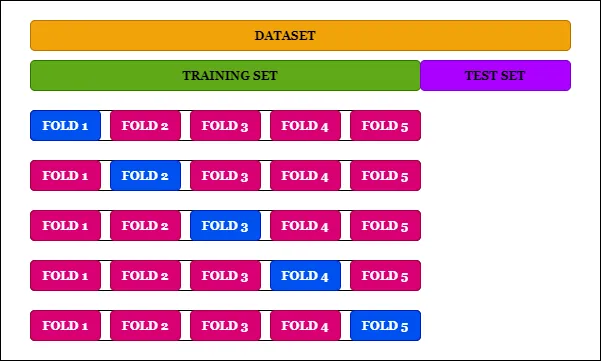

#K-Fold CV gives a model with less bias compared to other methods. In K-Fold CV, we have a paprameter ‘k’. This parameter decides how many folds the dataset is going to be divided. Every fold gets chance to appears in the training set (k-1) times, which in turn ensures that every observation in the dataset appears in the dataset, thus enabling the model to learn the underlying data distribution better.

##The value of ‘k’ used is generally between **5 or 10.** The value of ‘k’ should not be too low or too high. If the value of ‘k’ is too low (say k = 2), we will have a highly biased model. This case is similar to that of splitting the dataset into training and validation sets, hence the bias will be high and variance low. If the value of ‘k’ is large (say k = n (the number of observations)), then this approach is called Leave One Out CV (LOOCV). In this case, bias will be low but the variance will be high and the model will overfit, resulting in the model to fail in generalizing over the test set.

#Another approach is to shuffle the dataset just once prior to splitting the dataset into k folds, and then split, such that the ratio of the observations in each class remains the same in each fold. Also the test set does not overlap between consecutive iterations. This approach is called Stratified K-Fold CV. This approach is useful for imbalanced datasets.



###Worked Example
To make the cross-validation procedure concrete, let’s look at a worked example.

Imagine we have a data sample with 6 observations:

#[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

The first step is to pick a value for k in order to determine the number of folds used to split the data. Here, we will use a value of k=3. That means we will shuffle the data and then split the data into 3 groups. Because we have 6 observations, each group will have an equal number of 2 observations.

For example:

#Fold1: [0.5, 0.2]

#Fold2: [0.1, 0.3]

#Fold3: [0.4, 0.6]

We can then make use of the sample, such as to evaluate the skill of a machine learning algorithm.

Three models are trained and evaluated with each fold given a chance to be the held out test set.

For example:

#Model1: Trained on Fold1 + Fold2, Tested on Fold3

#Model2: Trained on Fold2 + Fold3, Tested on Fold1

#Model3: Trained on Fold1 + Fold3, Tested on Fold2

The models are then discarded after they are evaluated as they have served their purpose.

The skill scores are collected for each model and summarized for use.

###Cross-Validation API
We do not have to implement k-fold cross-validation manually. The scikit-learn library provides an implementation that will split a given data sample up.

The **KFold() scikit-learn class** can be used. It takes as arguments the **number of splits,** whether or not to shuffle the sample, and **the seed** for the pseudorandom number generator used prior to the shuffle.

##For example, we can create an instance that splits a dataset into 3 folds, shuffles prior to the split, and uses a value of 1 for the pseudorandom number generator.
************************************************************************
###class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)
K-Folds cross-validator

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

##n_splits:            int, default=5

Number of folds. Must be at least 2.

Changed in version 0.22: n_splits default value changed from 3 to 5.

##shuffle:   bool, default=False

Whether to shuffle the data before splitting into batches. Note that the samples within each split will not be shuffled.

##random_state:    int, RandomState instance or None, default=None

When shuffle is True, random_state affects the ordering of the indices, which controls the randomness of each fold. Otherwise, this parameter has no effect. Pass an int for reproducible output across multiple function calls.
***************************************************************************
#kfold = KFold(3, True, 1) #n_splits=3, shuffle=True,random_state=1

The split() function can then be called on the class where the data sample is provided as an argument. Called repeatedly, the split will return each group of train and test sets. Specifically, arrays are returned containing the indexes into the original data sample of observations to use for train and test sets on each iteration.

For example, we can enumerate the splits of the indices for a data sample using the created KFold instance as follows:

# enumerate splits
for train, test in kfold.split(data):
 print('train: %s, test: %s' % (train, test))

We can tie all of this together with our small dataset used in the worked example of the prior section.

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# prepare cross validation
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
 print('train: %s, test: %s' % (data[train], data[test]))

Running the example prints the specific observations chosen for each train and test set. The indices are used directly on the original data array to retrieve the observation values.

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]

train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]

train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]

Usefully, the k-fold cross validation implementation in scikit-learn is provided as a component operation within broader methods, such as grid-searching model hyperparameters and scoring a model on a dataset.

#Nevertheless, the KFold class can be used directly in order to split up a dataset prior to modeling such that all models will use the same data splits. This is especially helpful if you are working with very large data samples. The use of the same splits across algorithms can have benefits for statistical tests that you may wish to perform on the data later.

*************************************************************************

##Variations on Cross-Validation
There are a number of variations on the k-fold cross validation procedure.

Three commonly used variations are as follows:

##Train/Test Split:
Taken to one extreme, k may be set to 2 (not 1) such that a single train/test split is created to evaluate the model.

##LOOCV:
Taken to another extreme, k may be set to the total number of observations in the dataset such that each observation is given a chance to be the held out of the dataset. This is called leave-one-out cross-validation, or LOOCV for short.

##Stratified:
The splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation.

##Repeated:
This is where the k-fold cross-validation procedure is repeated n times, where importantly, the data sample is shuffled prior to each repetition, which results in a different split of the sample.

##Nested:
This is where k-fold cross-validation is performed within each fold of cross-validation, often to perform hyperparameter tuning during model evaluation. This is called nested cross-validation or double cross-validation.

**************************************************************************
#he choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller



### https://youtu.be/s5tNevBIg4Y

"""
Binary classification using keras - with manual enumeration over the
K-fold splits.

KFOLD is a model validation technique.

Cross-validation between multiple folds allows us to evaluate the model performance.


KFold library in sklearn provides train/test indices to split data in train/test sets.
Splits dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds
form the training set.

Split method witin KFold generates indices to split data into training and test set.

The split will divide the data into n_samples/n_splits groups.
One group is used for testing and the remaining data used for training.
All combinations of n_splits-1 will be used for cross validation.  


Normally, we would use cross_val_score in sklearn to automatically evaluate
the model over all splits and report the crossvalidation score. But, that method
is deisgned to handle traditional sklearn models such as SVM, RF,
gradient boosting etc. - NOT deep learning models from tensorflow or pytorch/

Therefore, we will first split data into multiple folds and then train the
model on each fold. We can manually iterate through the training over each fold.


Wisconsin breast cancer example
Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


"""

https://github.com/bnsreenu/python_for_microscopists/blob/master/301-Evaluating%20keras%20model%20using%20KFold%20cross%20validation/301b-Evaluating%20keras%20model%20using%20KFold%20cross%20validation%E2%80%8B.py




#############################################################

#Cross validation training -
####cross_val_score in sklearn is deisgned to handle traditional sklearn models
#### such as SVM, RF, gradient boosting etc. - NOT deep learning models from
####tensorflow or pytorch/

###First split data into multiple folds and then train the model on each fold.
####We can manually iterate through the training over each fold.

###Training the model of each fold and saving all models
###############################################################

In [31]:
import sys
("Python version is", sys.version)
import sklearn
print("Scikit-learn version is: ", sklearn.__version__)
import tensorflow as tf
print("Tensorflow version is: ", tf.__version__)

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


df = pd.read_csv("/content/wisc_bc_data.csv")

print(df.describe().T)  #Values need to be normalized before fitting.
print(df.isnull().sum())


#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

#Understand the data
#sns.countplot(x="Label", data=df) #M - malignant   B - benign


####### Replace categorical values with numbers########
df['Label'].value_counts()

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0

#Define x and normalize values
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)




Scikit-learn version is:  1.2.2
Tensorflow version is:  2.14.0
                   count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  

In [32]:
#Splitting data into multiple folds and training model on each fold every time.
from sklearn.model_selection import KFold
cv = KFold(n_splits=7, shuffle=True, random_state=42)
cv

KFold(n_splits=7, random_state=42, shuffle=True)

In [33]:
# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = [] #save accuracy from each fold

In [34]:
#Let us first convert our X from DataFrame to Numpy
#We didn't do this earlier as Scaler transformation does it automatically
X_array=X.to_numpy()


####class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)[source]
Transform features by scaling each feature to a given range.

##This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

##X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

##X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

MinMaxScaler doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value and the smallest one corresponds to the minimum value.

In [35]:
#Train the model for each split (fold)
#We will define the model inside the for loop as we want to initialize and
#compile it for each fold.
#We also need to scale values for each fold inside the loop
from sklearn.preprocessing import MinMaxScaler

for train, test in cv.split(X_array, Y):

    print('   ')
    print(f'Training for fold {fold_no} ...')

    #Scale data
    scaler = MinMaxScaler()
    train_X = X_array[train]
    test_X = X_array[test]
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    print('train: %s, test: %s' % (train_X, test_X))

    #Define the model - inside the loop so it trains from scratch for each fold
    #If defined outside, each fold training starts at where it left off at the previous fold
    #calling it as model2 instead of model to make sure no information from our
    #previous example is carried over (without restarting the kernel)
    model2 = Sequential()
    model2.add(Dense(16, input_dim=30, activation='relu'))
    model2.add(Dropout(0.2))
    model2.add(Dense(1))
    model2.add(Activation('sigmoid'))
    model2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])


  # Fit data to model
    history = model2.fit(train_X, Y[train],
                  batch_size=8,
                  epochs=20,
                  verbose=1)
    #Save model trained on each fold.
    model2.save('models/model_fold_'+str(fold_no)+'.h5')

    # Evaluate the model - report accuracy and capture it into a list for future reporting
    scores = model2.evaluate(test_X, Y[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)

    fold_no = fold_no + 1


   
Training for fold 1 ...
train: [[0.2612163  0.0906324  0.24498637 ... 0.32271478 0.24876799 0.08310376]
 [0.17706346 0.31247886 0.17811474 ... 0.27237113 0.27104278 0.136626  ]
 [0.21033319 0.12445046 0.20410873 ... 0.29591065 0.10585452 0.08395645]
 ...
 [0.16042859 0.16909029 0.15659283 ... 0.14       0.17129903 0.19572347]
 [0.40603748 0.42948935 0.38522815 ... 0.42130584 0.31736645 0.27994228]
 [0.70399726 0.18227934 0.68136399 ... 0.67560137 0.22964715 0.20739866]], test: [[0.19859093 0.24078458 0.18957445 ... 0.25536082 0.28247585 0.15590975]
 [0.22158618 0.4808928  0.21472993 ... 0.33171821 0.10782574 0.21172767]
 [0.66583492 0.38992222 0.65690727 ... 0.72611684 0.18036665 0.22924046]
 ...
 [0.37717109 0.14440311 0.3803368  ... 0.38075601 0.24876799 0.24294897]
 [0.30280346 0.28779168 0.28292922 ... 0.35910653 0.13207175 0.09320478]
 [0.36934292 0.14440311 0.34987073 ... 0.36735395 0.20520402 0.15125279]]
Epoch 1/20
61/61 [==============================] - 2s 7ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 2 ...
train: [[0.17128118 0.29653979 0.17614539 ... 0.27237113 0.27104278 0.136626  ]
 [0.19210564 0.22318339 0.18747841 ... 0.25536082 0.28247585 0.15590975]
 [0.20346443 0.10415225 0.20185198 ... 0.29591065 0.10585452 0.08395645]
 ...
 [0.29291495 0.27128028 0.27980098 ... 0.35910653 0.13207175 0.09320478]
 [0.3927777  0.41626298 0.38096883 ... 0.42130584 0.31736645 0.27994228]
 [0.35728146 0.12456747 0.34600235 ... 0.36735395 0.20520402 0.15125279]], test: [[0.25268588 0.06955017 0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.1930522  0.15847751 0.19141732 ... 0.36941581 0.34220382 0.23455333]
 [0.36012116 0.42560554 0.36348559 ... 0.37972509 0.13660556 0.16397744]
 ...
 [0.35112878 0.57474048 0.33487665 ... 0.19116838 0.15375517 0.06296734]
 [0.15518955 0.14982699 0.15486145 ... 0.14       0.17129903 0.19572347]
 [0.68100715 0.1633218  0.67383042 ... 0.67560137 0.22964715 0.20739866]]
Epoch 1/20
61/61 [==============================] - 2s 9ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 3 ...
train: [[0.25268588 0.0906324  0.24227766 ... 0.32271478 0.29983369 0.08310376]
 [0.17128118 0.31247886 0.17614539 ... 0.27237113 0.32668092 0.136626  ]
 [0.19210564 0.24078458 0.18747841 ... 0.25536082 0.34046092 0.15590975]
 ...
 [0.3927777  0.42948935 0.38096883 ... 0.42130584 0.38251366 0.27994228]
 [0.35728146 0.14440311 0.34600235 ... 0.36735395 0.24732716 0.15125279]
 [0.68100715 0.18227934 0.67383042 ... 0.67560137 0.27678784 0.20739866]], test: [[0.21718964 0.31552249 0.21014443 ... 0.22900344 0.3492516  0.18234291]
 [0.32320507 0.47480555 0.33010849 ... 0.69175258 0.68115942 0.35130526]
 [0.26925079 0.25667907 0.25886255 ... 0.19250859 0.26680922 0.09077791]
 ...
 [0.27351034 0.30875888 0.26314698 ... 0.28563574 0.28011404 0.11373475]
 [0.27776989 0.39431857 0.26839887 ... 0.19247423 0.21929199 0.17361931]
 [0.22570874 0.26547176 0.22182296 ... 0.34707904 0.21691613 0.14777647]]
Epoch 1/20
61/61 [==============================] - 2s 2ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 4 ...
train: [[0.25268588 0.11120332 0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.17128118 0.38340249 0.17614539 ... 0.27237113 0.27104278 0.136626  ]
 [0.19210564 0.29543568 0.18747841 ... 0.25536082 0.28247585 0.15590975]
 ...
 [0.3927777  0.52697095 0.38096883 ... 0.42130584 0.31736645 0.27994228]
 [0.35728146 0.17717842 0.34600235 ... 0.36735395 0.20520402 0.15125279]
 [0.68100715 0.22365145 0.67383042 ... 0.67560137 0.22964715 0.20739866]], test: [[0.20346443 0.1526971  0.20185198 ... 0.29591065 0.10585452 0.08395645]
 [0.41312888 0.17510373 0.40225278 ... 0.47216495 0.2282673  0.10278106]
 [0.30616688 0.35643154 0.29583305 ... 0.27185567 0.21939681 0.07208448]
 ...
 [0.63225898 0.48962656 0.63651441 ... 0.92268041 0.78710822 0.31063886]
 [0.09318946 0.25103734 0.10331007 ... 0.13216495 0.01714962 0.14548078]
 [0.33456387 0.72365145 0.32886463 ... 0.36013746 0.13502858 0.18476978]]
Epoch 1/20
61/61 [==============================] - 1s 2ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 5 ...
train: [[0.22670062 0.0906324  0.22001707 ... 0.32349294 0.24876799 0.08310376]
 [0.14246535 0.31247886 0.15194195 ... 0.2730279  0.27104278 0.136626  ]
 [0.16401391 0.24078458 0.16360791 ... 0.25597658 0.28247585 0.15590975]
 ...
 [0.37166365 0.42948935 0.36278276 ... 0.42232174 0.31736645 0.27994228]
 [0.33493315 0.14440311 0.32678902 ... 0.36823975 0.20520402 0.15125279]
 [0.66991527 0.18227934 0.66424811 ... 0.67723045 0.22964715 0.20739866]], test: [[ 0.2668593   0.37301319  0.27073552 ...  0.40682053  0.19672777
   0.1751279 ]
 [ 0.30407953  0.23368279  0.29200455 ...  0.21433     0.21959393
   0.1439066 ]
 [ 0.31975121  0.61345959  0.31747048 ...  0.28312091  0.06406466
   0.15033451]
 ...
 [-0.03477154  0.12580318 -0.02937829 ...  0.          0.2694658
   0.2543618 ]
 [ 0.42945296  0.35170781  0.43661972 ...  0.70099897  0.29351469
   0.26334776]
 [ 0.34815613  0.26885357  0.34115806 ...  0.2861867   0.40114331
   0.11681753]]
Epoch 1/20
61/61 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 6 ...
train: [[0.25268588 0.0906324  0.24227766 ... 0.32271478 0.23627255 0.10612106]
 [0.17128118 0.31247886 0.17614539 ... 0.27237113 0.25891784 0.17539689]
 [0.19210564 0.24078458 0.18747841 ... 0.25536082 0.27054108 0.20035657]
 ...
 [0.3927777  0.42948935 0.38096883 ... 0.42130584 0.30601202 0.36089651]
 [0.35728146 0.14440311 0.34600235 ... 0.36735395 0.19198397 0.19432889]
 [0.68100715 0.18227934 0.67383042 ... 0.67560137 0.21683367 0.26700059]], test: [[0.38851815 0.11836321 0.37219266 ... 0.28103093 0.16813627 0.10569658]
 [0.16607506 0.323977   0.163223   ... 0.11006873 0.23607214 0.1724255 ]
 [0.59676274 0.51707812 0.57984935 ... 0.50378007 0.12925852 0.0483912 ]
 ...
 [0.60622841 0.52113629 0.59850736 ... 0.595189   0.33206413 0.24993633]
 [0.25931185 0.48461278 0.27765877 ... 0.75945017 0.54468938 1.29289413]
 [0.19399877 0.16909029 0.18257204 ... 0.14797251 0.0509018  0.15213516]]
Epoch 1/20
61/61 [==============================] - 1s 2ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


   
Training for fold 7 ...
train: [[0.25268588 0.0906324  0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.19210564 0.24078458 0.18747841 ... 0.25536082 0.28247585 0.15590975]
 [0.20346443 0.12445046 0.20185198 ... 0.29591065 0.10585452 0.08395645]
 ...
 [0.15518955 0.16909029 0.15486145 ... 0.14       0.17129903 0.19572347]
 [0.35728146 0.14440311 0.34600235 ... 0.36735395 0.20520402 0.15125279]
 [0.68100715 0.18227934 0.67383042 ... 0.67560137 0.22964715 0.20739866]], test: [[0.17128118 0.31247886 0.17614539 ... 0.27237113 0.27104278 0.136626  ]
 [0.28723555 0.32465336 0.26826066 ... 0.03817869 0.17228464 0.05148892]
 [0.22381561 0.25295908 0.21346141 ... 0.37766323 0.19850187 0.10448642]
 ...
 [0.34402953 0.40615489 0.34441296 ... 0.49725086 0.39936921 0.30407976]
 [0.27824317 0.12208319 0.26971184 ... 0.39690722 0.16104869 0.19998688]
 [0.3927777  0.42948935 0.38096883 ... 0.42130584 0.31736645 0.27994228]]
Epoch 1/20
61/61 [==============================] - 1s 3ms/step - loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
for acc in acc_per_fold:
    print("accuracy for this fold is: ", acc)


accuracy for this fold is:  96.34146094322205
accuracy for this fold is:  95.12194991111755
accuracy for this fold is:  93.82715821266174
accuracy for this fold is:  95.06173133850098
accuracy for this fold is:  91.35802388191223
accuracy for this fold is:  90.12345671653748
accuracy for this fold is:  95.06173133850098


In [37]:
# report performance
print('Accuracy: ', (np.mean(acc)))

Accuracy:  95.06173133850098


## https://youtu.be/s5tNevBIg4Y

"""
Binary classification using keras - with cross_val_score method

KFOLD is a model validation technique.

Cross-validation between multiple folds allows us to evaluate the model performance.

KFold library in sklearn provides train/test indices to split data in train/test sets.
Splits dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds
form the training set.

Split method witin KFold generates indices to split data into training and test set.

The split will divide the data into n_samples/n_splits groups.
One group is used for testing and the remaining data used for training.
All combinations of n_splits-1 will be used for cross validation.  


Normally, we would use cross_val_score in sklearn to automatically evaluate
the model over all splits and report the crossvalidation score. But, that method
is deisgned to handle traditional sklearn models such as SVM, RF,
gradient boosting etc. - NOT deep learning models from tensorflow or pytorch/

Therefore, in order to use cross_val_score, we will find a way to make our
keras model available to the function. This is done using the KerasClassifier
from tensorflow.keras.wrappers.scikit_learn

Note that the cross_val_score() function takes the dataset and cross-validation
configuration and returns a list of scores calculated for each fold.

Wisconsin breast cancer example
Dataset link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


"""
https://github.com/bnsreenu/python_for_microscopists/blob/master/301-Evaluating%20keras%20model%20using%20KFold%20cross%20validation/301c-Evaluating%20keras%20model%20using%20KFold%20cross%20validation%E2%80%8B.py



In [38]:
import sys
("Python version is", sys.version)
import sklearn
print("Scikit-learn version is: ", sklearn.__version__)
import tensorflow as tf
print("Tensorflow version is: ", tf.__version__)


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout


df = pd.read_csv("/content/wisc_bc_data.csv")

print(df.describe().T)  #Values need to be normalized before fitting.
print(df.isnull().sum())


#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

#Understand the data
#sns.countplot(x="Label", data=df) #M - malignant   B - benign


####### Replace categorical values with numbers########
df['Label'].value_counts()

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0

#Define x and normalize values
#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)

Scikit-learn version is:  1.2.2
Tensorflow version is:  2.14.0
                   count          mean           std          min  \
id                 569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean        569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean       569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean     569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean          569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean    569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean   569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean     569.0  8.879932e-02  7.971981e-02     0.000000   
points_mean        569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean      569.0  1.811619e-01  2.741428e-02     0.106000   
dimension_mean     569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se          569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se         569.0  1.216853e+00  

In [39]:
!pip install scikeras



In [40]:
!pip install tensorflow==2.14.0


In [41]:
#############################################
#W e really didn't have to do this deliberately via for loop
# we can use KerasClassifier from tensorflow's sklearn wrapper to define a
# keras model that can be used in cross_val_score

###############################

#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from tensorflow import keras
from scikeras.wrappers import KerasClassifier

#from keras.utils import to_categorical
#from tensorflow import keras

# Define a function for our model so we can call it in cross_val_score
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=30, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss= 'binary_crossentropy' ,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


# create model
my_keras_model = KerasClassifier(build_fn=create_model,
                                 epochs=20, batch_size=16,
                                 verbose=0)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

# define the pipeline to include scaling and the model.
#This pipeline will be the input to cross_val_score, instead of the model.
from sklearn.preprocessing import MinMaxScaler

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', my_keras_model))
pipeline = Pipeline(steps=steps)


# Define the crossvalidation process to be used inside cross_val_score evaluation
cv = KFold(n_splits=7, random_state=42, shuffle=True)

In [43]:
# evaluate the model -
scores = cross_val_score(pipeline, X, Y, scoring='accuracy',cv=cv, n_jobs=1)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [44]:
for score in scores:
    print("Score for this split is: ", score)

Score for this split is:  0.9512195121951219
Score for this split is:  0.926829268292683
Score for this split is:  0.8888888888888888
Score for this split is:  0.9259259259259259
Score for this split is:  0.9506172839506173
Score for this split is:  0.8765432098765432
Score for this split is:  0.9382716049382716


In [45]:
# report performance
print('Accuracy: ', (np.mean(scores)))

Accuracy:  0.9226136705811502
